# Power Plants

* **Data:** `powerplants.csv`
* **Columns of interest:**
    * `Plant_Name` is the name of the power plant
    * `Utility_Na` is the name of the owner of the power plant
    * `City`, `County`, `StateName`, `Zip`
    * `PrimSource` is what kind of energy source it uses (nuclear, coal, etc)
    * `Total_MW` is the total amount of energy produces

## Read in the data

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("powerplants.csv")
#df.head()
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,.2f}'.format)

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['plant_code', 'plant_name', 'utility_na', 'utility_id', 'sector_nam',
       'city', 'county', 'statename', 'zip', 'street_add', 'primsource',
       'install_mw', 'total_mw', 'coal_mw', 'ng_mw', 'crude_mw', 'bio_mw',
       'hydro_mw', 'hydrops_mw', 'nuclear_mw', 'solar_mw', 'wind_mw', 'geo_mw',
       'other_mw', 'source_des', 'tech_desc', 'source', 'period', 'latitude',
       'longitude'],
      dtype='object')

## What are the different types of energy sources in this dataset?

In [15]:
df.primsource.value_counts()

solar             2255
natural gas       1701
hydroelectric     1410
wind              1043
petroleum          842
biomass            726
coal               337
other              140
geothermal          66
nuclear             61
pumped storage      35
Name: primsource, dtype: int64

## What is the most common type of power plant in the United States?

In [18]:
df.primsource.value_counts().head(1)

solar    2255
Name: primsource, dtype: int64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:>

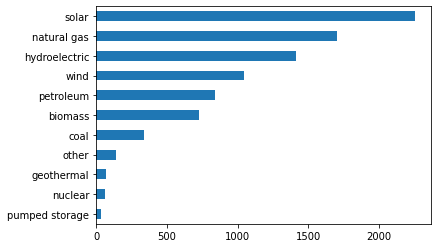

In [20]:
df.primsource.value_counts().sort_values().plot(kind='barh')


## What type of power plant produces the most energy in the United States?

In [28]:
df.groupby(by='primsource').total_mw.median().sort_values(ascending=False)

primsource
nuclear          1,751.00
coal               521.00
pumped storage     420.00
natural gas         89.30
wind                59.40
geothermal          19.00
other               11.55
hydroelectric        6.70
biomass              6.70
petroleum            6.60
solar                3.50
Name: total_mw, dtype: float64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:ylabel='primsource'>

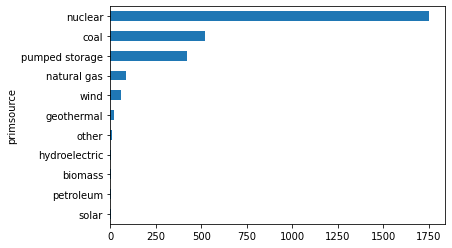

In [32]:
df.groupby(by='primsource').total_mw.median().sort_values().plot(kind='barh')

## What US state has the most power plants?

In [40]:
df.groupby(by='statename').plant_name.count().sort_values(ascending=False).head()

statename
California        1344
North Carolina     626
Texas              431
New York           407
Minnesota          366
Name: plant_name, dtype: int64

## What three US states produce the most energy?

In [42]:
df.groupby(by='statename').total_mw.median().sort_values(ascending=False).head()


statename
Texas         146.00
Mississippi   132.00
Oklahoma      122.50
Kentucky      110.00
Alabama        98.50
Name: total_mw, dtype: float64

## What state has the most solar power plants?

In [49]:
#df[df.primsource == 'solar']

df.primsource.str.contains('solar', na=False).value_counts()
df[df.primsource.str.contains('solar', na=False)].statename.value_counts().head()

California        503
North Carolina    478
Massachusetts     230
New Jersey        183
Minnesota          91
Name: statename, dtype: int64

## What state produces the most energy using coal?

In [52]:
df.head()
#total_mw
#primsource
#statename

#which state produces the most energy? 

df.groupby(by='statename').total_mw.median().sort_values(ascending=False)

#which of these states use coal plants?
df[df.primsource.str.contains('coal', na=False)].statename.value_counts().head()

#merged.groupby(by='neighborhood').Primary_Breed.value_counts().groupby(level=0, group_keys=False).nlargest(1)


Illinois        21
Pennsylvania    21
Texas           18
Indiana         17
Iowa            15
Name: statename, dtype: int64

In [54]:
df[df.primsource.str.contains('coal', na=False)].groupby(by='statename').total_mw.median().sort_values(ascending=False).head()

#is this right?? 

statename
Georgia         1,793.00
Washington      1,340.00
West Virginia   1,293.50
Tennessee       1,283.10
Florida         1,250.00
Name: total_mw, dtype: float64

## List all of the nuclear powerplants in New York.

In [73]:
ny_df = df[df.statename == 'New York']
ny_df[ny_df.primsource == 'nuclear'].plant_name

1155                     Indian Point 2
1213    Nine Mile Point Nuclear Station
1861                James A Fitzpatrick
1868      R E Ginna Nuclear Power Plant
2536                     Indian Point 3
Name: plant_name, dtype: object

## What is the most common type of powerplant in Vermont?

In [74]:
df[df.statename == 'Vermont'].primsource.value_counts()


hydroelectric    46
solar            31
petroleum         7
wind              5
biomass           4
Name: primsource, dtype: int64

## What type of power plant produces the most power in Texas?

In [70]:
df[df.statename == 'Texas'].groupby(by='primsource').total_mw.median().sort_values(ascending=False)

primsource
nuclear         2,480.00
coal            1,037.00
natural gas       359.50
wind              150.00
other              18.80
hydroelectric      10.90
solar              10.00
biomass             8.20
petroleum           7.60
Name: total_mw, dtype: float64